<a href="https://colab.research.google.com/github/SuhyeonHa/PatternRecognition/blob/master/pattern_recognition_hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
########################################################################
## Pattern Recognition - HW2 (Problem 1)
## Chung-Ang University
## Lecturer: Jongwon Choi (The graduate school of advanced imaging science, multimedia & film)
##           email: choijw@cau.ac.kr
########################################################################

# DO NOT USE ANY ADDITIONAL LIBRARY
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

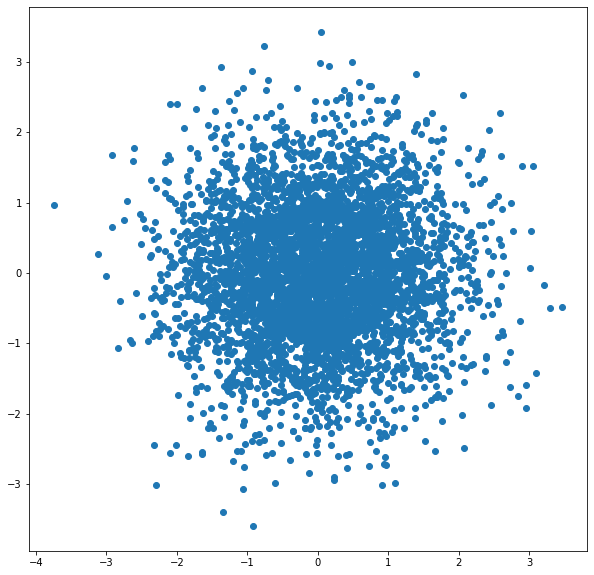

In [171]:
###################
##   NOISY DATA  ##
###################
SIZE_SAMPLE = 5000
SIZE_INLIER1 = 500
SIZE_INLIER2 = 500
np.random.seed(0)
feature_inlier1 = 0.5*np.random.randn(SIZE_INLIER1, 2)
feature_inlier1[:, 1] = 1.2327*feature_inlier1[:, 0] + 0.1*np.random.randn(SIZE_INLIER1)
feature_inlier2 = np.random.uniform(-1, 1, (SIZE_INLIER2, 2))
feature_inlier2[:, 1] = (2*(np.random.randn(SIZE_INLIER2)>0)-1)*np.sqrt(np.abs((0.837 + 0.1*np.random.randn(SIZE_INLIER2)) - feature_inlier2[:, 0]**2))
feature_outlier = np.random.randn(SIZE_SAMPLE-SIZE_INLIER1-SIZE_INLIER2, 2)
feature = np.random.permutation(np.concatenate( (feature_inlier1, feature_inlier2, feature_outlier), 0 ))

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(feature[:, 0], feature[:, 1])
f.show()

In [0]:
#############################################################
## Problem 1 - A : Fill in the following 2 variables according to the results of your program!
linear_model = np.zeros(2) # [a, b] in a linear model of "ax + by = 0"
inlier_flag = np.zeros(SIZE_SAMPLE) # 0 if a sample is outlier, 1 otherwise.

In [173]:
print(f' feature {feature.shape}')
print(f' feature_inlier1 {feature_inlier1.shape}')
print(f' feature_inlier2 {feature_inlier2.shape}')
print(f' feature_outlier {feature_outlier.shape}')
print(f' linear_model {linear_model.shape}')
print(f' inlier_flag {inlier_flag.shape}')

 feature (5000, 2)
 feature_inlier1 (500, 2)
 feature_inlier2 (500, 2)
 feature_outlier (4000, 2)
 linear_model (2,)
 inlier_flag (5000,)


In [0]:
def dist(a, b, point): # distance between a line and a point
  x = point[0]
  y = point[1]
  result = abs(a*x+b*y)/((a**2+b**2)**0.5)
  # print(result)
  return result

In [175]:
############################################################
## Your implementation
# Hyperparameters
thresh = 0.5
iteration = 500

best_model = np.ones(2)
best_inlier_num = 0
best_inlier_list = []

for itr in range(iteration):
  # randomly select two sampels
  sample_index = np.random.choice(SIZE_SAMPLE, 2, replace=False)
  samples = []
  samples.append(feature[sample_index[0]])
  samples.append(feature[sample_index[1]])
  # print(samples)

  # Knowing two points (x1, y1), (x2, y2) on the line,
  # (y2-y1)x-(x2-x1)y = 0
  x1 = samples[0][0]
  y1 = samples[0][1]
  x2 = samples[1][0]
  y2 = samples[1][1]
  a = y2-y1
  b = -(x2-x1)

  inlier_list = []
  outlier_list = []

  for i in feature:
    if dist(a, b, i) < thresh:
      inlier_list.append(i)
    else:
      outlier_list.append(i)

  if len(inlier_list) > best_inlier_num:
    best_inlier_list = inlier_list
    best_model[0] = a
    best_model[1] = b
    best_inlier_num = len(best_inlier_list)
  
  # print(f'inlier_list len: {len(inlier_list)}')
  # print(f'outlier_list len: {len(outlier_list)}') 

print(f'best_inlier num: {len(best_inlier_list)}')
print(f'best_model: {best_model}') 

best_inlier num: 2265
best_model: [-1.25413806  0.54792403]


In [0]:
# Re-fit the model based on the estimated inliers

In [0]:
def ObjFnc(X, y, w):
  y_hat = X@w
  diff = y_hat - y
  temp = np.power(diff, 2)
  return np.sum(temp)

In [178]:
# X: (n,d), y: (n,1), w: (d,1)
# Solve X = [x y], w = [a b], y = [0] to find w
X = np.mat(best_inlier_list)
y = np.mat(np.ones(best_inlier_num)).T
w = np.mat(np.array(best_model)).T
print(X.shape)
print(y.shape)
print(w.shape)

(2265, 2)
(2265, 1)
(2, 1)


In [179]:
lr = 1e-3
itr = 1000
cost_list = []

for i in range(itr):
  cost_prev = ObjFnc(X, y, w)
  cost_list.append(cost_prev)
  # print(cost_prev)
  new_w = w - lr*w
  cost_next = ObjFnc(X, y, new_w)
  # print(cost_next)
  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    w = new_w

final_step = i
final_w = w
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
print(f'final_w {final_w}')
# print(f'cost {cost_list}')

final_step 999
final_cost 2306.3924316619095
final_w [[-0.46114083]
 [ 0.20146916]]


In [0]:
# Update linear_model with final w (gradient)
linear_model[0] = final_w[0]
linear_model[1] = final_w[1]

count = 0
for p in range(len(feature)):
  for q in range(len(best_inlier_list)):
    if feature[p][0]==best_inlier_list[q][0] and feature[p][1]==best_inlier_list[q][1]:
      count = count + 1
      inlier_flag[p] = 1

# print(inlier_flag)

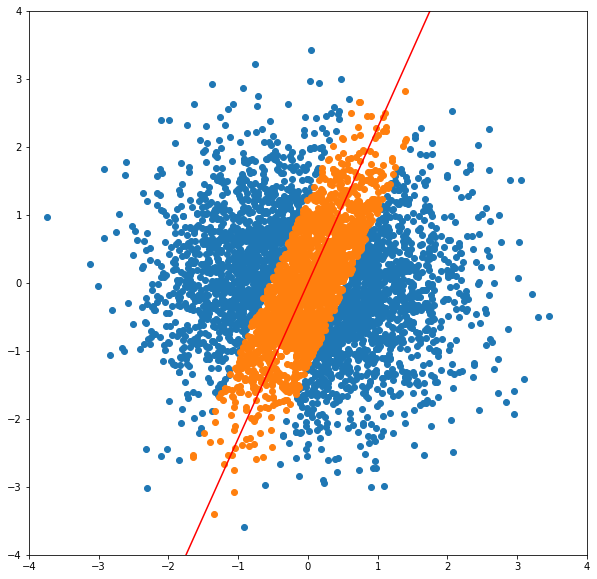

In [181]:
############################################################
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(feature[inlier_flag==0, 0], feature[inlier_flag==0, 1]) #outlier scatter
ax.scatter(feature[inlier_flag==1, 0], feature[inlier_flag==1, 1]) #inlier scatter
x_range = np.arange(-4,4,0.01)
ax.plot(x_range, -1*linear_model[0]/linear_model[1]*x_range, 'r') #linear model output
plt.xlim(-4, 4)
plt.ylim(-4, 4)
f.show()

In [0]:
#############################################################
## Problem 1 - B : Fill in the following 2 variables according to the results of your program!
circle_model = np.zeros(3) # [cx, cy, r] : (cx, cy) is center point, r is radius
inlier_flag = np.zeros(SIZE_SAMPLE) # 0 if a sample is outlier, 1 otherwise.

In [0]:
def dist_circle(cx, cy, point): # distance between two points
  x = point[0]
  y = point[1]
  temp = (cx - x)**2+(cy - y)**2
  result = temp**0.5
  # print(result)
  return result

In [184]:
############################################################
## Your implementation
# Hyperparameters
thresh = 0.5
iteration = 100

best_model = np.ones(3)
best_inlier_num = 0
best_inlier_list = []

for itr in range(iteration):
# randomly select three sampels
  sample_index = np.random.choice(SIZE_SAMPLE, 3, replace=False)
  samples = []
  samples.append(feature[sample_index[0]])
  samples.append(feature[sample_index[1]])
  samples.append(feature[sample_index[2]])
  # print(samples)

  # Knowing three points (x1, y1), (x2, y2), (x3, y3) on the circle,
  # solve a matrix equation x^2+y^2+Ax+By+C = 0 to get [cx, cy, r]

  x1 = samples[0][0]
  y1 = samples[0][1]
  x2 = samples[1][0]
  y2 = samples[1][1]
  x3 = samples[2][0]
  y3 = samples[2][1]

  # print(f'(x1, y1): {(x1, y1)}')
  # print(f'(x2, y2): {(x2, y2)}')
  # print(f'(x3, y3): {(x3, y3)}')

  # Solve three linear matrix equation 
  # Ax+By+C = -x^2-y^2
  a = np.array([[x1, y1, 1], [x2, y2, 1], [x3, y3, 1]])
  b = np.array([-(x1**2)-(y1**2), -(x2**2)-(y2**2), -(x3**2)-(y3**2)])

  sol = np.linalg.solve(a, b)
  # print(f'solution [A, B, C]: {sol}')

  A = sol[0]
  B = sol[1]
  C = sol[2]
  cx = -A/2
  cy = -B/2
  r = (A**2 + B**2 - 4*C)**0.5/2
  # print(A, B, C, cx, cy, r)

  inlier_list = []
  outlier_list = []

  for i in feature:
    d = dist_circle(cx, cy, i)
    if r-thresh < d and d < r+thresh:
      inlier_list.append(i)
    else:
      outlier_list.append(i)

  if len(inlier_list) > best_inlier_num:
    best_inlier_list = inlier_list
    best_model[0] = cx
    best_model[1] = cy
    best_model[2] = r
    best_inlier_num = len(best_inlier_list)

# print(f'inlier_list len: {len(inlier_list)}')
# print(f'outlier_list len: {len(outlier_list)}') 

print(f'best_inlier num: {best_inlier}')
print(f'best_model: {best_model}') 

best_inlier num: 2973
best_model: [-0.23955105  0.03993578  0.88084019]


In [0]:
# Update linear_model with final cx, cy, r
circle_model[0] = best_model[0]
circle_model[1] = best_model[1]
circle_model[2] = best_model[2]

count = 0
for p in range(len(feature)):
  for q in range(len(best_inlier_list)):
    if feature[p][0]==best_inlier_list[q][0] and feature[p][1]==best_inlier_list[q][1]:
      count = count + 1
      inlier_flag[p] = 1

# print(inlier_flag)

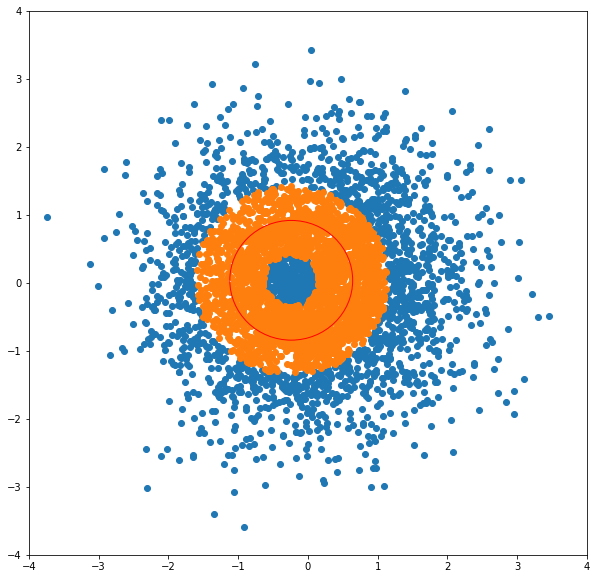

In [186]:
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(feature[inlier_flag==0, 0], feature[inlier_flag==0, 1]) #outlier scatter
ax.scatter(feature[inlier_flag==1, 0], feature[inlier_flag==1, 1]) #inlier scatter
circle1 = plt.Circle((circle_model[0], circle_model[1]), circle_model[2], color='r', fill=False) #circle model output
ax.add_artist(circle1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
f.show()